In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_IxoE5JN.csv")
test = pd.read_csv("test_WudNWDM.csv")
sample_sub = pd.read_csv("sample_submission_jn0a7vR.csv")

train.shape, test.shape, sample_sub.shape

((94992, 3), (26304, 2), (26304, 2))

In [3]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime'].dt.date.value_counts()#.sort_index()

2008-03-01    24
2015-05-13    24
2015-05-15    24
2015-05-16    24
2015-05-17    24
              ..
2011-10-15    24
2011-10-16    24
2011-10-17    24
2011-10-18    24
2018-12-31    24
Name: datetime, Length: 3958, dtype: int64

In [4]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['datetime'].dt.date.value_counts().sort_index()

2019-01-01    24
2019-01-02    24
2019-01-03    24
2019-01-04    24
2019-01-05    24
              ..
2021-12-27    24
2021-12-28    24
2021-12-29    24
2021-12-30    24
2021-12-31    24
Name: datetime, Length: 1096, dtype: int64

# EDA

## Complete TS

<AxesSubplot:xlabel='datetime'>

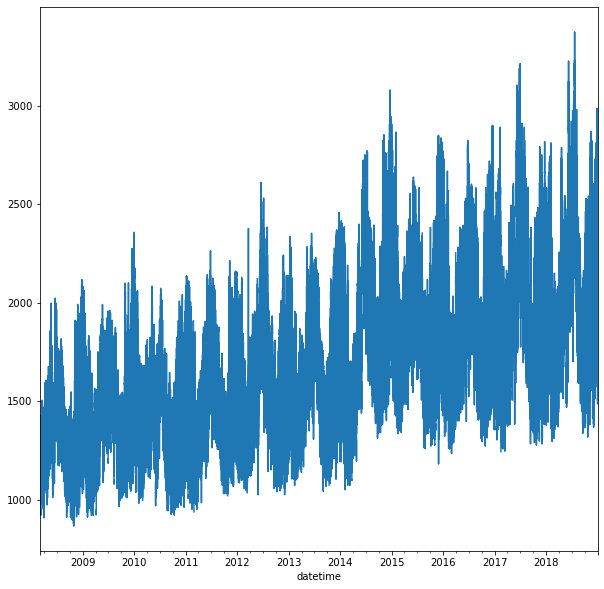

In [5]:
train[['datetime','energy']].set_index('datetime')['energy'].plot(figsize=(10,10))

<AxesSubplot:xlabel='datetime'>

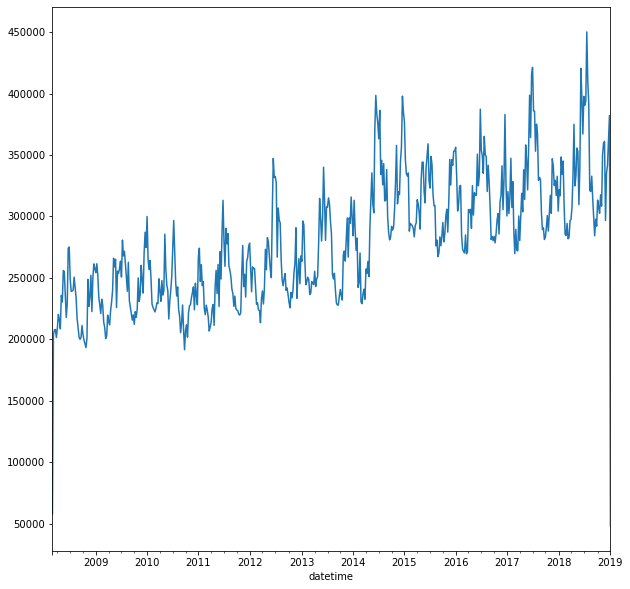

In [6]:
train[['datetime','energy']].set_index('datetime')['energy'].resample('W').sum().plot(figsize=(10,10))

## YoY Daily

In [7]:
train['doy_h'] = train['datetime'].dt.dayofyear.astype(str).str.zfill(3) + '|' + train['datetime'].dt.hour.astype(str).str.zfill(2)
train['year'] = train['datetime'].dt.year
train.head()

,row_id,datetime,energy,doy_h,year
0,1,2008-03-01 00:00:00,1259.985563,061|00,2008
1,2,2008-03-01 01:00:00,1095.541500,061|01,2008
2,3,2008-03-01 02:00:00,1056.247500,061|02,2008
3,4,2008-03-01 03:00:00,1034.742000,061|03,2008
4,5,2008-03-01 04:00:00,1026.334500,061|04,2008


<AxesSubplot:xlabel='doy_h'>

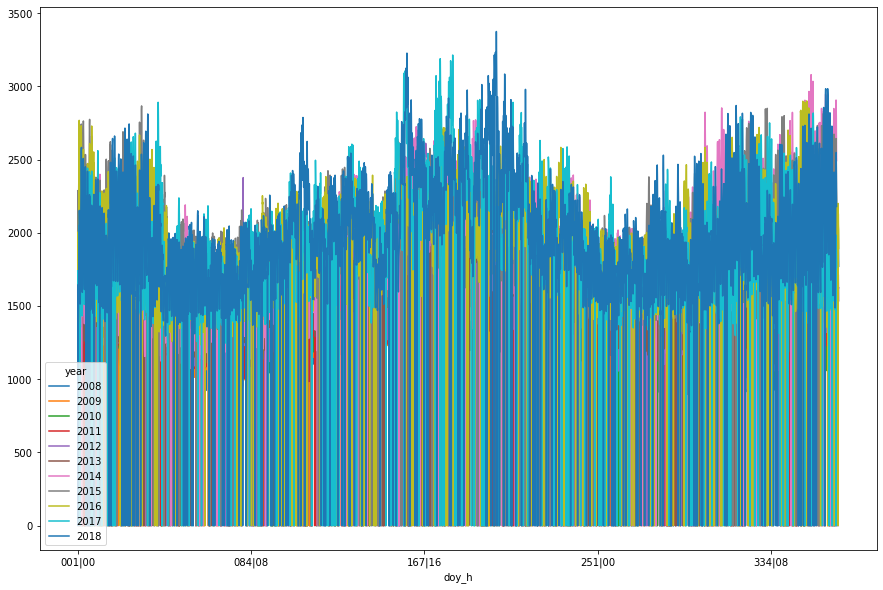

In [8]:
yoy = train.groupby(['doy_h','year'])['energy'].sum().unstack()
yoy.plot(figsize=(15,10))

<AxesSubplot:xlabel='doy_h'>

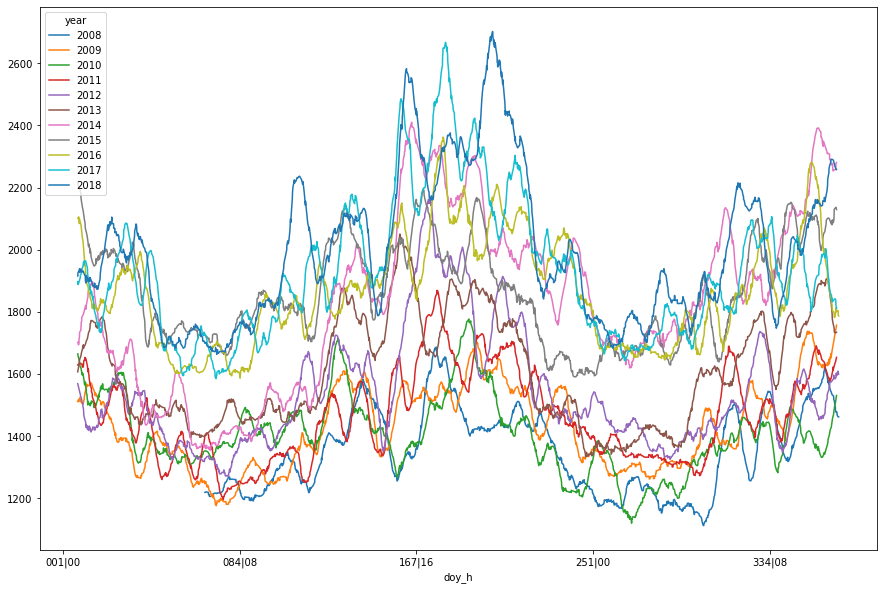

In [9]:
yoy.rolling(24*7).mean().loc[:,:].plot(figsize=(15,10))

## YoY DoM

In [380]:
8//7

1

<AxesSubplot:xlabel='dom'>

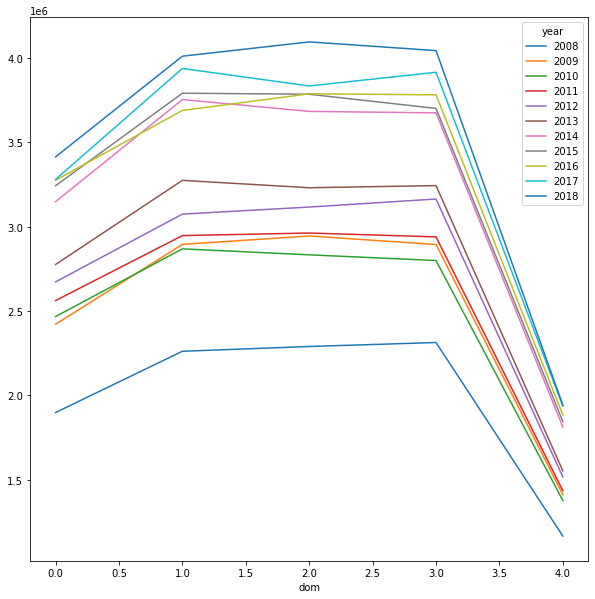

In [381]:
train['dom'] = train['datetime'].dt.day//7

train.groupby(['dom','year'])['energy'].sum().unstack().plot(figsize=(10,10))

## YoY DoW

In [10]:
train['dow'] = train['datetime'].dt.dayofweek

<AxesSubplot:xlabel='dow'>

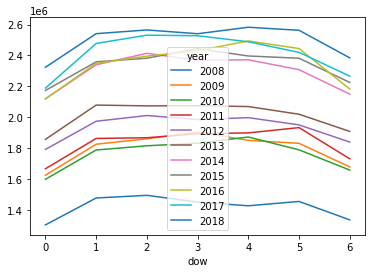

In [11]:
train.groupby(['dow','year'])['energy'].sum().unstack().plot()

## YoY MoY

<AxesSubplot:xlabel='month'>

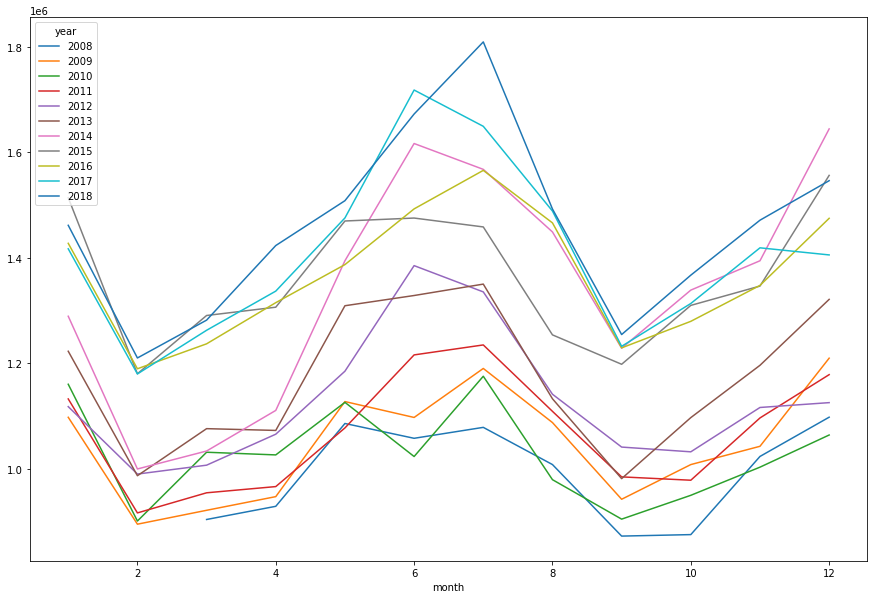

In [12]:
train['month'] = train['datetime'].dt.month
yoy = train.groupby(['month','year'])['energy'].sum().unstack()
yoy.plot(figsize=(15,10))

In [13]:
train.groupby(['month','year'])['energy'].sum().unstack()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,
1,NaN,1.097660e+06,1.160245e+06,1.132423e+06,1.117823e+06,1.222795e+06,1.289157e+06,1.513836e+06,1.427396e+06,1.416982e+06,1.461525e+06
2,NaN,8.950083e+05,9.009759e+05,9.163941e+05,9.900306e+05,9.869065e+05,9.996684e+05,1.180119e+06,1.189606e+06,1.179799e+06,1.210071e+06
3,9.039156e+05,9.213476e+05,1.031392e+06,9.545074e+05,1.006875e+06,1.076096e+06,1.033698e+06,1.290583e+06,1.236880e+06,1.262562e+06,1.281786e+06
4,9.288909e+05,9.472536e+05,1.026329e+06,9.662874e+05,1.065587e+06,1.072724e+06,1.110661e+06,1.306311e+06,1.314904e+06,1.336786e+06,1.423164e+06
5,1.085890e+06,1.127434e+06,1.125962e+06,1.077491e+06,1.185006e+06,1.309080e+06,1.394385e+06,1.469697e+06,1.387060e+06,1.475493e+06,1.508187e+06
6,1.057816e+06,1.097324e+06,1.023275e+06,1.215882e+06,1.385104e+06,1.328461e+06,1.616558e+06,1.475280e+06,1.492652e+06,1.717932e+06,1.672476e+06
7,1.078533e+06,1.190189e+06,1.175417e+06,1.234778e+06,1.335297e+06,1.350075e+06,1.567566e+06,1.458446e+06,1.565644e+06,1.649171e+06,1.809148e+06
8,1.008029e+06,1.087627e+06,9.793890e+05,1.108908e+06,1.141360e+06,1.132738e+06,1.448933e+06,1.253849e+06,1.466118e+06,1.488550e+06,1.492413e+06
9,8.724509e+05,9.422665e+05,9.045873e+05,9.846841e+05,1.041174e+06,9.813673e+05,1.228592e+06,1.198125e+06,1.229217e+06,1.232157e+06,1.254471e+06


## YoY Quarterly

<AxesSubplot:xlabel='quarter'>

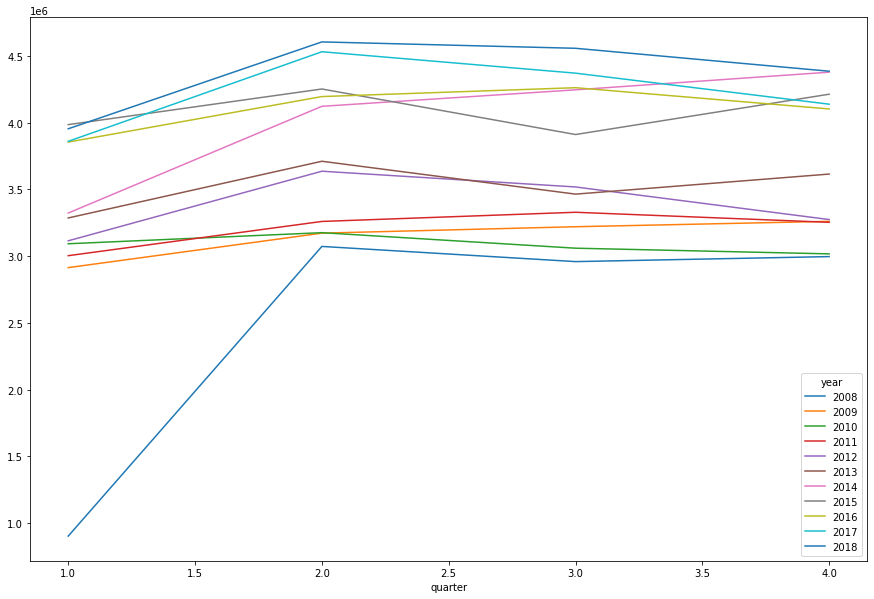

In [14]:
train['quarter'] = train['datetime'].dt.quarter
yoy = train.groupby(['quarter','year'])['energy'].sum().unstack()
yoy.plot(figsize=(15,10))

## YoY Hourly

In [15]:
train['hour'] = train['datetime'].dt.hour

<AxesSubplot:xlabel='hour'>

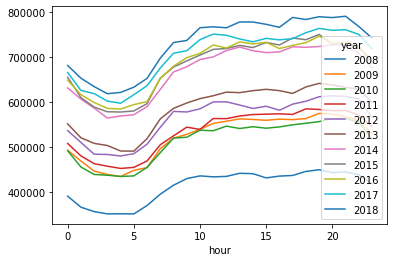

In [16]:
train.groupby(['hour','year'])['energy'].sum().unstack().plot()

In [18]:
train['date'] = train['datetime'].dt.date

In [19]:
train['daily_energy'] = train['date'].map(train.groupby('date')['energy'].sum())
train['dth_ratio'] = train['energy']/train['daily_energy']
train

,row_id,datetime,energy,doy_h,year,dow,month,quarter,hour,date,daily_energy,dth_ratio
0,1,2008-03-01 00:00:00,1259.985563,061|00,2008,5,3,1,0,2008-03-01,30336.129562,0.041534
1,2,2008-03-01 01:00:00,1095.541500,061|01,2008,5,3,1,1,2008-03-01,30336.129562,0.036113
2,3,2008-03-01 02:00:00,1056.247500,061|02,2008,5,3,1,2,2008-03-01,30336.129562,0.034818
3,4,2008-03-01 03:00:00,1034.742000,061|03,2008,5,3,1,3,2008-03-01,30336.129562,0.034109
4,5,2008-03-01 04:00:00,1026.334500,061|04,2008,5,3,1,4,2008-03-01,30336.129562,0.033832
...,...,...,...,...,...,...,...,...,...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800,365|19,2018,0,12,4,19,2018-12-31,48053.720000,0.052617
94988,94989,2018-12-31 20:00:00,2461.883600,365|20,2018,0,12,4,20,2018-12-31,48053.720000,0.051232
94989,94990,2018-12-31 21:00:00,2365.994400,365|21,2018,0,12,4,21,2018-12-31,48053.720000,0.049236
94990,94991,2018-12-31 22:00:00,2342.942800,365|22,2018,0,12,4,22,2018-12-31,48053.720000,0.048757


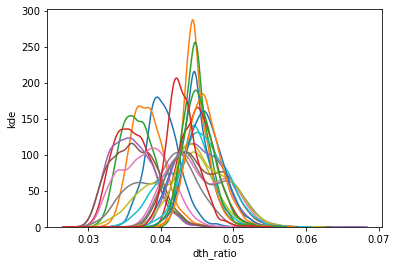

In [20]:
train.groupby('hour')['dth_ratio'].apply(lambda x: sns.kdeplot(x, label = x.name))
plt.xlabel('dth_ratio')
plt.ylabel('kde')
plt.show()

In [21]:
yoy_dth_dist = train.groupby(['year','hour'])['dth_ratio'].describe().reset_index()
yoy_dth_dist['coef_var'] = yoy_dth_dist['std']/yoy_dth_dist['mean']
yoy_dth_dist.groupby(['year'])['coef_var'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2008,24.0,0.064361,0.017022,0.035390,0.049644,0.064569,0.076821,0.098139
2009,24.0,0.065620,0.018342,0.036302,0.050657,0.063868,0.078985,0.100359
2010,24.0,0.067425,0.017620,0.039645,0.052349,0.065701,0.081755,0.100075
2011,24.0,0.065747,0.017668,0.035481,0.050266,0.064628,0.078057,0.095903
2012,24.0,0.068817,0.016689,0.040046,0.053678,0.070866,0.081393,0.096795
2013,24.0,0.067397,0.019802,0.039533,0.051481,0.065224,0.081843,0.104841
2014,24.0,0.069852,0.018967,0.039954,0.055540,0.070891,0.084631,0.101999
2015,24.0,0.069593,0.018160,0.041907,0.055314,0.068112,0.082100,0.103912
2016,24.0,0.068186,0.018160,0.035628,0.052541,0.068182,0.082813,0.097428


In [22]:
train.groupby(['year','hour'])['dth_ratio'].mean().unstack().std()

hour
0     0.000102
1     0.000114
2     0.000160
3     0.000179
4     0.000225
5     0.000249
6     0.000253
7     0.000206
8     0.000233
9     0.000224
10    0.000216
11    0.000135
12    0.000095
13    0.000090
14    0.000149
15    0.000232
16    0.000248
17    0.000249
18    0.000193
19    0.000137
20    0.000128
21    0.000107
22    0.000199
23    0.000160
dtype: float64

# Validation Set Creation

## Datetime Level

In [23]:
test['datetime'].dt.year.value_counts()

2020    8784
2019    8760
2021    8760
Name: datetime, dtype: int64

In [539]:
train_ts = train[train['year']<=2015][['datetime','energy']].rename(columns = {'datetime':"ds",'energy':'y'}).sort_values('ds')
val_ts = train[train['year']>2015][['datetime','energy']].rename(columns = {'datetime':"ds",'energy':'y'}).sort_values('ds')

In [540]:
train_ts['y'].fillna(train_ts['y'].rolling(6).mean(),inplace=True)

In [596]:
final_train = train[['datetime','energy']].rename(columns = {'datetime':"ds",'energy':'y'}).sort_values('ds')
final_train['y'].fillna(final_train['y'].rolling(6).mean(), inplace=True)
final_future = test['datetime'].to_frame().rename(columns = {'datetime':'ds'})

## Date Level

<AxesSubplot:xlabel='date'>

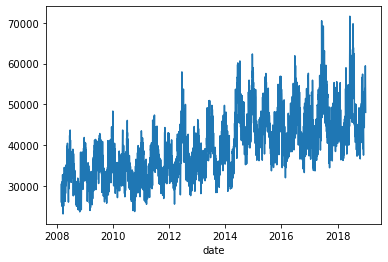

In [252]:
train['date'] = train['datetime'].dt.date
train.groupby('date')['energy'].sum().plot()

In [253]:
train_ts = train[train['year']<=2015].groupby('date')['energy'].sum().reset_index().rename(columns = {'date':'ds','energy':"y"})
val_ts = train[train['year']>2015].groupby('date')['energy'].sum().reset_index().rename(columns = {'date':'ds','energy':"y"})

In [308]:
final_train = train.groupby('date')['energy'].sum().reset_index().rename(columns = {'date':'ds','energy':"y"})

final_future = pd.DataFrame({'ds':test['datetime'].dt.date.unique()}).sort_values('ds')
final_future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
1091,2021-12-27
1092,2021-12-28
1093,2021-12-29
1094,2021-12-30


# Prophet Exploration

In [541]:
from prophet import Prophet
from prophet.plot import plot_plotly

from neuralprophet import NeuralProphet

In [542]:
# help(Prophet)
# help(cross_validation)

In [543]:
train[train.energy.isnull()]['month'].value_counts()#.plot()

1     185
8     178
10    173
6     165
7     162
9     161
5     157
12    157
4     154
3     151
11    149
2     108
Name: month, dtype: int64

In [573]:
model = Prophet(yearly_seasonality=25, weekly_seasonality=True, daily_seasonality=True,  changepoint_range=0.9)#,  seasonality_prior_scale=0.05)#,seasonality_prior_scale=15)#,seasonality_mode='multiplicative')#, seasonality_mode='multiplicative')
# model.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')

In [574]:
# help(NeuralProphet)

In [575]:
# # model  = NeuralProphet()# if you're using default variables below.
# model = NeuralProphet(
#     changepoints_range=0.9,#
#     trend_reg=0,
#     trend_reg_threshold=False,
#     yearly_seasonality=True,
#     weekly_seasonality=True,
#     daily_seasonality=True,
#     seasonality_mode="additive",
#     seasonality_reg=0,
#     n_forecasts=1,
#     n_lags=3,
#     num_hidden_layers=1,
#     d_hidden=3,     # Dimension of hidden layers of AR-Net
#      # Sparcity in the AR coefficients
#     learning_rate=None,
#     epochs=40,
#     loss_func="Huber",
#     normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
#     impute_missing=True 
# )

In [576]:
train_ts.set_index('ds').resample('W').sum().reset_index()

,ds,y
0,2008-03-02,57947.864062
1,2008-03-09,203704.786500
2,2008-03-16,207691.800000
3,2008-03-23,208006.594500
4,2008-03-30,201479.011500
...,...,...
405,2015-12-06,346208.363800
406,2015-12-13,341617.187600
407,2015-12-20,353058.773600
408,2015-12-27,353142.236200


In [577]:
model.fit(train_ts)

23:42:13 - cmdstanpy - INFO - Chain [1] start processing
23:43:13 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True,changepoint_range=0.9,**params).fit(final_train)  # Fit model with given params
    df_cv = cross_validation(m,  horizon='730 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [252]:
# help(model.make_future_dataframe)

In [253]:
# model.make_future_dataframe(periods=365)

In [172]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,  horizon = '438 days', parallel='processes')

Exception: Model has not been fit. Fitting the model provides contextual parameters for cross validation.

In [160]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-10-21 00:00:00,1365.778251,1196.051476,1518.686978,1319.0500,2011-10-20 23:00:00
1,2011-10-21 01:00:00,1293.551589,1133.993246,1454.601484,1238.9450,2011-10-20 23:00:00
2,2011-10-21 02:00:00,1238.795964,1076.410274,1407.422916,1206.5700,2011-10-20 23:00:00
3,2011-10-21 03:00:00,1207.364377,1050.199766,1379.268974,1192.7875,2011-10-20 23:00:00
4,2011-10-21 04:00:00,1204.192431,1040.278596,1376.500179,1189.4575,2011-10-20 23:00:00
...,...,...,...,...,...,...
61789,2015-12-31 19:00:00,2927.036245,1567.126473,4038.416430,2563.1450,2014-10-19 23:00:00
61790,2015-12-31 20:00:00,2943.182835,1552.913469,4058.101530,2477.1162,2014-10-19 23:00:00
61791,2015-12-31 21:00:00,2932.859720,1577.258454,4072.690536,2384.3664,2014-10-19 23:00:00
61792,2015-12-31 22:00:00,2887.614727,1509.012856,3991.735950,2351.4946,2014-10-19 23:00:00


In [161]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [169]:
df_p['rmse'].describe()#['horizon']

count    9460.000000
mean      386.457213
std        85.767006
min       219.423382
25%       310.521811
50%       409.033334
75%       468.400488
max       491.596289
Name: rmse, dtype: float64

In [190]:
train_ts

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
68683,2015-12-31 19:00:00,2563.145000
68684,2015-12-31 20:00:00,2477.116200
68685,2015-12-31 21:00:00,2384.366400
68686,2015-12-31 22:00:00,2351.494600


In [578]:
future = pd.DataFrame({'ds':pd.date_range('2016-01-01','2018-12-31 23:00:00', freq='H'),'y':np.nan}) #change to D if date-level
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01 00:00:00,2101.469671,1910.383182,2290.934241
1,2016-01-01 01:00:00,2021.055568,1831.932522,2215.333063
2,2016-01-01 02:00:00,1959.740311,1765.122314,2167.628433
3,2016-01-01 03:00:00,1924.300991,1723.596701,2111.638342
4,2016-01-01 04:00:00,1919.748244,1727.452612,2108.186181


In [579]:
# future = pd.DataFrame({'ds':pd.date_range('2016-01-01','2018-12-31 23:00:00', freq='H')}) #change to D if date-level
forecast_train = model.predict(train_ts)
forecast_train[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-03-01 00:00:00,1209.264129,1009.610874,1403.392459
1,2008-03-01 01:00:00,1127.400159,926.713911,1323.298213
2,2008-03-01 02:00:00,1064.620838,884.680427,1249.678921
3,2008-03-01 03:00:00,1027.695231,825.858354,1227.510285
4,2008-03-01 04:00:00,1021.624239,817.835223,1216.486630


In [580]:
future.tail()

,ds,y
26299,2018-12-31 19:00:00,NaN
26300,2018-12-31 20:00:00,NaN
26301,2018-12-31 21:00:00,NaN
26302,2018-12-31 22:00:00,NaN
26303,2018-12-31 23:00:00,NaN


In [581]:
forecast['actuals'] = forecast['ds'].map(val_ts.set_index('ds')['y'])
forecast['y'] = forecast['actuals']
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,actuals,y
0,2016-01-01 00:00:00,1918.711112,1910.383182,2290.934241,1918.711112,1918.711112,182.758559,182.758559,182.758559,-74.077671,...,57.136298,199.699932,199.699932,199.699932,0.0,0.0,0.0,2101.469671,2002.2470,2002.2470
1,2016-01-01 01:00:00,1918.715162,1831.932522,2215.333063,1918.715162,1918.715162,102.340406,102.340406,102.340406,-154.878645,...,57.427693,199.791358,199.791358,199.791358,0.0,0.0,0.0,2021.055568,1843.3870,1843.3870
2,2016-01-01 02:00:00,1918.719212,1765.122314,2167.628433,1918.719212,1918.719212,41.021098,41.021098,41.021098,-216.518856,...,57.656119,199.883835,199.883835,199.883835,0.0,0.0,0.0,1959.740311,1735.1178,1735.1178
3,2016-01-01 03:00:00,1918.723263,1723.596701,2111.638342,1918.723263,1918.723263,5.577728,5.577728,5.577728,-252.219763,...,57.820162,199.977328,199.977328,199.977328,0.0,0.0,0.0,1924.300991,1666.1970,1666.1970
4,2016-01-01 04:00:00,1918.727313,1727.452612,2108.186181,1918.727313,1918.727313,1.020931,1.020931,1.020931,-256.970167,...,57.919296,200.071802,200.071802,200.071802,0.0,0.0,0.0,1919.748244,1630.3924,1630.3924


In [582]:
forecast_train['actuals'] = forecast_train['ds'].map(train_ts.set_index('ds')['y'])
forecast_train.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,actuals
0,2008-03-01 00:00:00,1398.605885,1009.610874,1403.392459,1398.605885,1398.605885,-189.341755,-189.341755,-189.341755,-74.077671,...,48.652172,48.652172,-163.916257,-163.916257,-163.916257,0.0,0.0,0.0,1209.264129,1259.985563
1,2008-03-01 01:00:00,1398.585342,926.713911,1323.298213,1398.585342,1398.585342,-271.185183,-271.185183,-271.185183,-154.878645,...,47.642612,47.642612,-163.949150,-163.949150,-163.949150,0.0,0.0,0.0,1127.400159,1095.541500
2,2008-03-01 02:00:00,1398.564799,884.680427,1249.678921,1398.564799,1398.564799,-333.943961,-333.943961,-333.943961,-216.518856,...,46.552197,46.552197,-163.977303,-163.977303,-163.977303,0.0,0.0,0.0,1064.620838,1056.247500
3,2008-03-01 03:00:00,1398.544256,825.858354,1227.510285,1398.544256,1398.544256,-370.849025,-370.849025,-370.849025,-252.219763,...,45.371510,45.371510,-164.000772,-164.000772,-164.000772,0.0,0.0,0.0,1027.695231,1034.742000
4,2008-03-01 04:00:00,1398.523713,817.835223,1216.486630,1398.523713,1398.523713,-376.899473,-376.899473,-376.899473,-256.970167,...,44.090310,44.090310,-164.019617,-164.019617,-164.019617,0.0,0.0,0.0,1021.624239,1026.334500


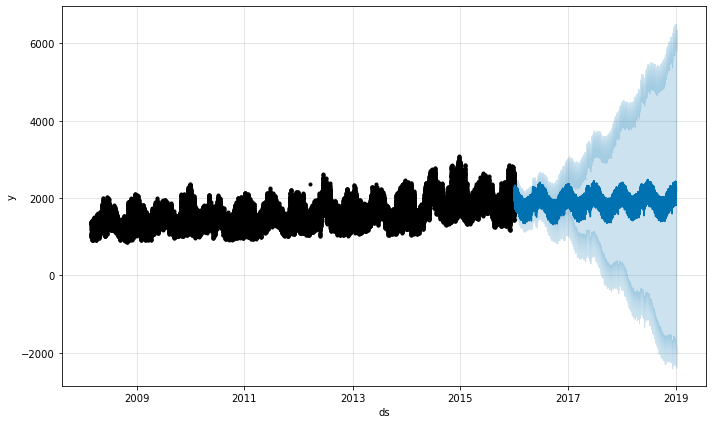

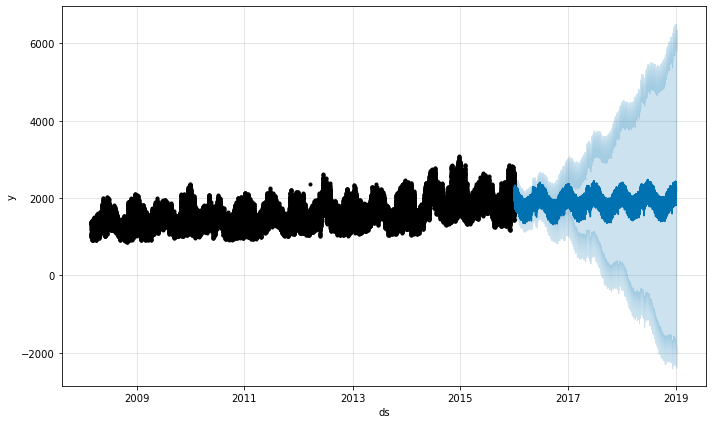

In [583]:
model.plot(forecast)#, uncertainty=True)

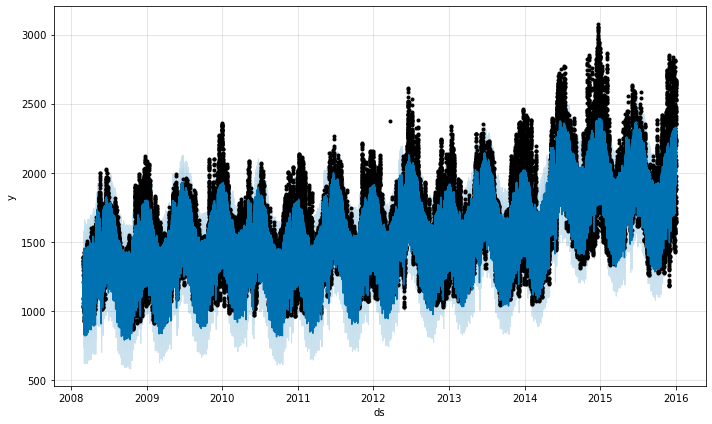

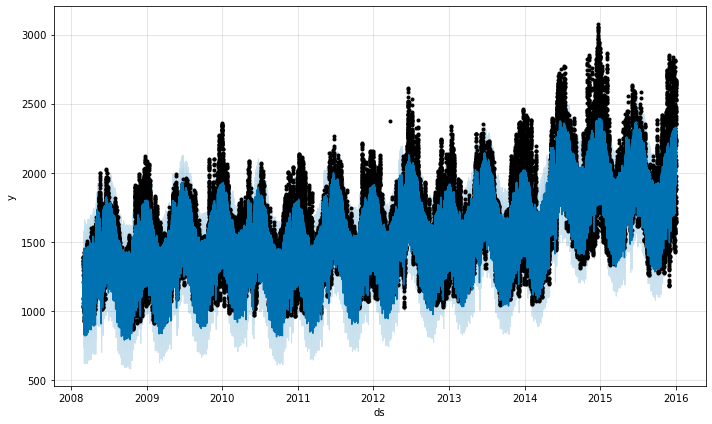

In [584]:
model.plot(forecast_train, uncertainty=True)

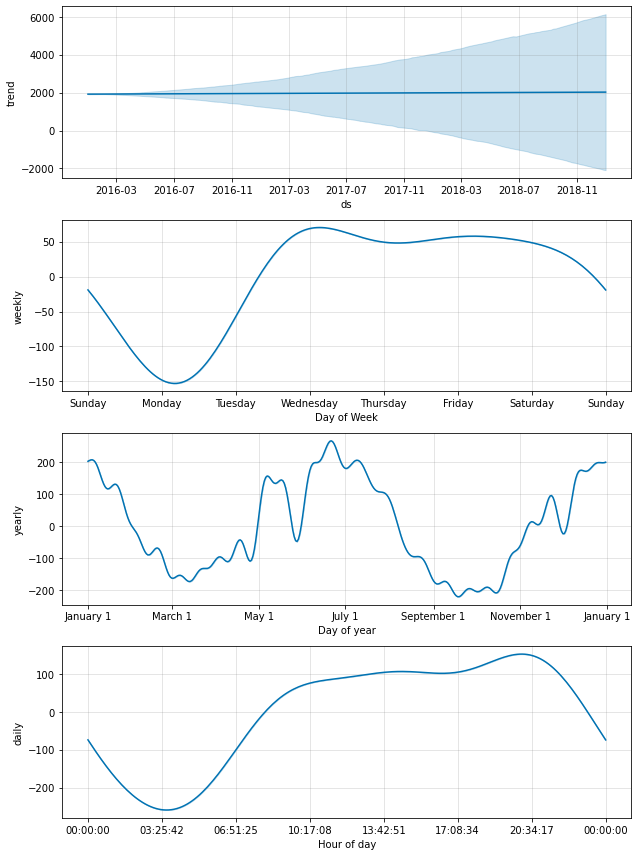

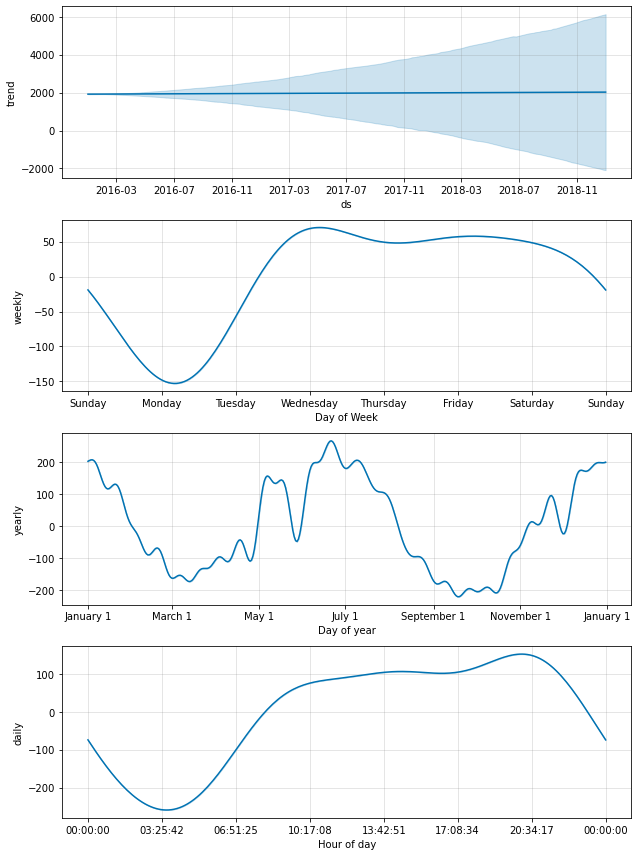

In [585]:
model.plot_components(forecast)

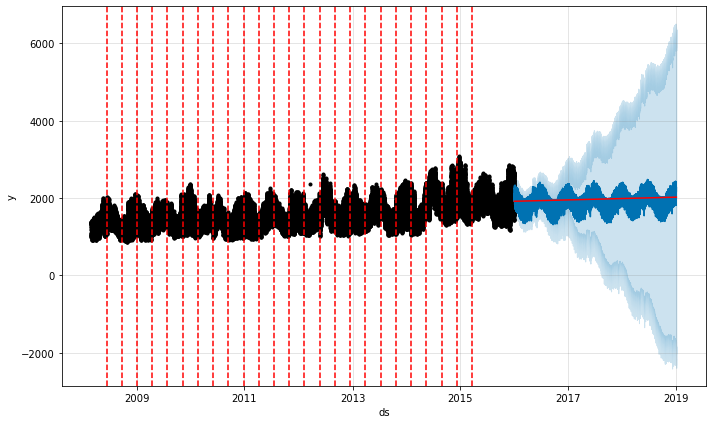

In [586]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [587]:
model.changepoints

2424    2008-06-11 17:00:00
4848    2008-09-22 16:00:00
7272    2009-01-03 18:00:00
9696    2009-04-16 18:00:00
12120   2009-07-28 16:00:00
14544   2009-11-08 18:00:00
16968   2010-02-19 23:00:00
19392   2010-06-03 00:00:00
21816   2010-09-14 09:00:00
24240   2010-12-26 07:00:00
26664   2011-04-07 19:00:00
29088   2011-07-19 12:00:00
31511   2011-10-30 09:00:00
33935   2012-02-10 21:00:00
36359   2012-05-23 22:00:00
38783   2012-09-04 05:00:00
41207   2012-12-16 03:00:00
43631   2013-03-29 04:00:00
46055   2013-07-10 03:00:00
48479   2013-10-21 13:00:00
50903   2014-02-01 17:00:00
53327   2014-05-15 14:00:00
55751   2014-08-26 04:00:00
58175   2014-12-07 10:00:00
60599   2015-03-20 10:00:00
Name: ds, dtype: datetime64[ns]

In [588]:
forecast[['actuals','yhat']].isnull().mean() 

actuals    0.020757
yhat       0.000000
dtype: float64

In [589]:
train[train['energy'].isnull()]['datetime'].dt.hour.value_counts().sort_index()

0     77
1     86
2     83
3     74
4     71
5     64
6     98
7     82
8     73
9     95
10    84
11    76
12    76
13    72
14    96
15    79
16    80
17    67
18    86
19    72
20    86
21    76
22    77
23    70
Name: datetime, dtype: int64

In [590]:
train.isnull().mean()

row_id          0.000000
datetime        0.000000
energy          0.020002
doy_h           0.000000
year            0.000000
dow             0.000000
month           0.000000
quarter         0.000000
hour            0.000000
date            0.000000
daily_energy    0.000000
dth_ratio       0.020002
dom             0.000000
dtype: float64

<AxesSubplot:xlabel='ds'>

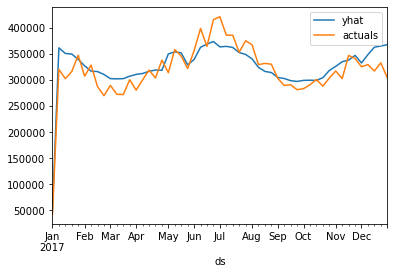

In [591]:
forecast[forecast['ds'].dt.year==2017].set_index('ds')[['yhat','actuals']].resample('W').sum().plot()

<AxesSubplot:xlabel='ds'>

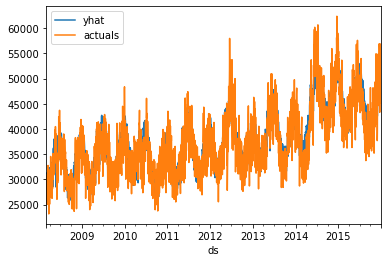

In [592]:
forecast_train.set_index('ds')[['yhat','actuals']].resample('D').sum().iloc[:-1].plot()

In [593]:
forecast.set_index('ds')[['yhat','actuals']].to_clipboard()

In [594]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(forecast[forecast['actuals'].notnull()]['actuals'], forecast[forecast['actuals'].notnull()]['yhat']))


mean_squared_error(forecast[forecast['actuals'].notnull()]['actuals'], forecast[forecast['actuals'].notnull()]['yhat'], squared=False)

174.25702615846913


225.36529811221462

In [595]:
print(mean_absolute_error(forecast_train[forecast_train['actuals'].notnull()]['actuals'], forecast_train[forecast_train['actuals'].notnull()]['yhat']))


mean_squared_error(forecast_train[forecast_train['actuals'].notnull()]['actuals'], forecast_train[forecast_train['actuals'].notnull()]['yhat'], squared=False)

117.89333712046587


154.00185083609972

In [602]:
## Prorated Model

In [600]:
hourly_prorata_ratio = train[train['year']<=2015].groupby('hour').dth_ratio.mean()

C:\Users\apoor\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


<AxesSubplot:xlabel='ds'>

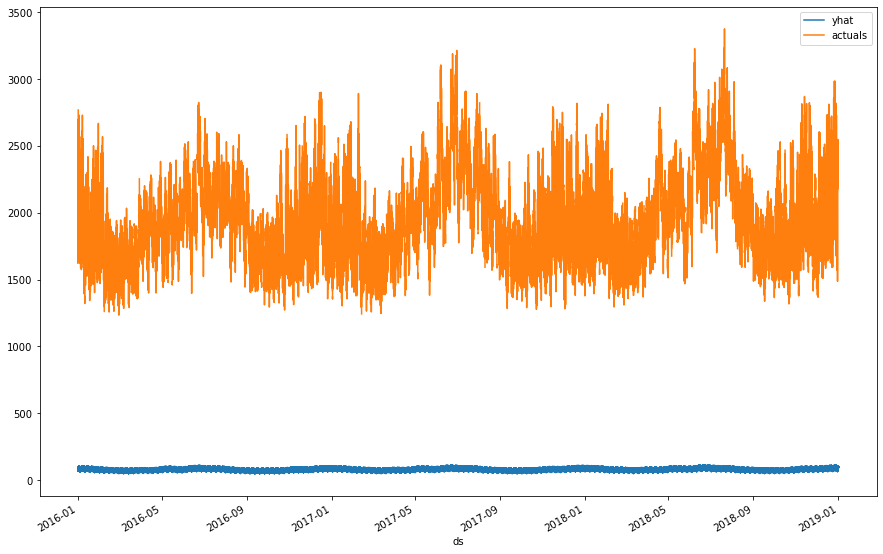

In [601]:
from itertools import product
forecast_prorated = pd.DataFrame()
forecast_prorated['date'] = pd.Series(list(set(product(set(forecast['ds']), set(list(range(24))))))).str.get(0)
forecast_prorated['hour'] = pd.Series(list(set(product(set(forecast['ds']), set(list(range(24))))))).str.get(1)
forecast_prorated['dth_ratio'] = forecast_prorated['hour'].map(hourly_prorata_ratio)
forecast_prorated['yhat_daily'] = forecast_prorated['date'].map(forecast.set_index('ds')['yhat'])
forecast_prorated['yhat'] = forecast_prorated['yhat_daily']*forecast_prorated['dth_ratio']
forecast_prorated['ds'] = forecast_prorated['date'] + pd.to_timedelta(forecast_prorated['hour'], unit='H')
forecast_prorated['actuals'] = forecast_prorated['ds'].map(train.set_index('datetime')['energy'])
forecast_prorated.set_index('ds')[['yhat','actuals']].plot(figsize=(15,10))

In [305]:
forecast_prorated.isnull().mean()

date          0.000000
hour          0.000000
dth_ratio     0.000000
yhat_daily    0.000000
yhat          0.000000
ds            0.000000
actuals       0.020757
dtype: float64

In [306]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast_prorated[forecast_prorated['actuals'].notnull()]['actuals'], forecast_prorated[forecast_prorated['actuals'].notnull()]['yhat'])

168.04176894103054

## Final Model

In [597]:
model_final = Prophet(yearly_seasonality=25, weekly_seasonality=True, daily_seasonality=True,  changepoint_range=0.9)#,  seasonality_prior_scale=0.05)#,seasonality_prior_scale=15)#,seasonality_mode='multiplicative')#, seasonality_mode='multiplicative')
model_final.fit(final_train)

forecast_final = model_final.predict(final_future)
forecast_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

23:47:17 - cmdstanpy - INFO - Chain [1] start processing
23:48:51 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01 00:00:00,2057.810606,1830.699178,2290.352393
1,2019-01-01 01:00:00,1982.788829,1759.499062,2197.544887
2,2019-01-01 02:00:00,1928.108472,1707.993758,2149.350952
3,2019-01-01 03:00:00,1900.444209,1689.877576,2113.543465
4,2019-01-01 04:00:00,1904.968373,1695.965107,2127.874850


In [310]:
hourly_prorata_ratio_final = train.groupby('hour').dth_ratio.mean()

C:\Users\apoor\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


<AxesSubplot:xlabel='ds'>

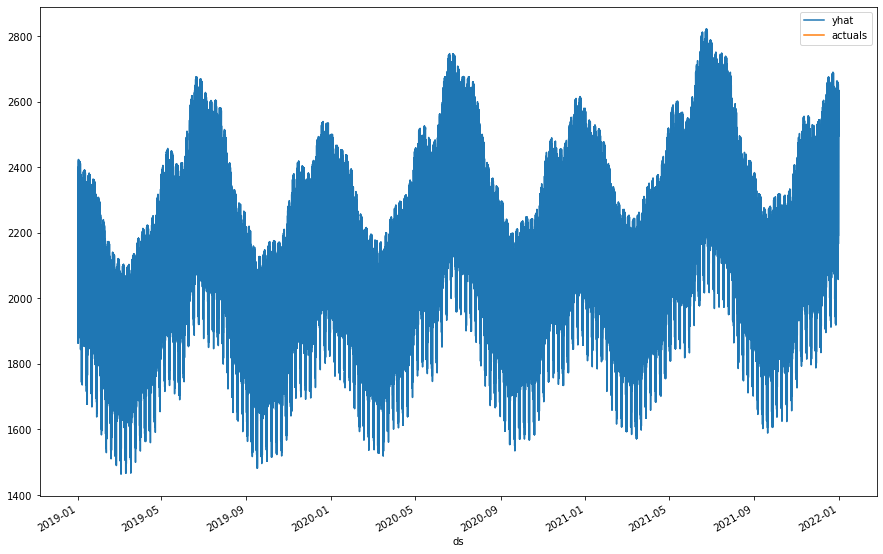

In [311]:
from itertools import product
forecast_prorated_final = pd.DataFrame()
forecast_prorated_final['date'] = pd.Series(list(set(product(set(forecast_final['ds']), set(list(range(24))))))).str.get(0)
forecast_prorated_final['hour'] = pd.Series(list(set(product(set(forecast_final['ds']), set(list(range(24))))))).str.get(1)
forecast_prorated_final['dth_ratio'] = forecast_prorated_final['hour'].map(hourly_prorata_ratio_final)
forecast_prorated_final['yhat_daily'] = forecast_prorated_final['date'].map(forecast_final.set_index('ds')['yhat'])
forecast_prorated_final['yhat'] = forecast_prorated_final['yhat_daily']*forecast_prorated['dth_ratio']
forecast_prorated_final['ds'] = forecast_prorated_final['date'] + pd.to_timedelta(forecast_prorated_final['hour'], unit='H')
forecast_prorated_final['actuals'] = forecast_prorated_final['ds'].map(train.set_index('datetime')['energy'])
forecast_prorated_final.set_index('ds')[['yhat','actuals']].plot(figsize=(15,10))

In [313]:
forecast_prorated_final.isnull().mean()

date          0.0
hour          0.0
dth_ratio     0.0
yhat_daily    0.0
yhat          0.0
ds            0.0
actuals       1.0
dtype: float64

In [315]:
forecast_prorated_final['row_id'] = forecast_prorated_final['ds'].map(test.set_index('datetime')['row_id'])
forecast_prorated_final.sort_values('row_id')

,date,hour,dth_ratio,yhat_daily,yhat,ds,actuals,row_id
4590,2019-01-01 00:00:00,0,0.040312,52019.069743,2098.619036,2019-01-01 00:00:00,NaN,94993
9870,2019-01-01 00:00:00,1,0.038160,52019.069743,2341.768592,2019-01-01 01:00:00,NaN,94994
17933,2019-01-01 00:00:00,2,0.036873,52019.069743,2399.416956,2019-01-01 02:00:00,NaN,94995
23234,2019-01-01 00:00:00,3,0.036189,52019.069743,1983.261323,2019-01-01 03:00:00,NaN,94996
5023,2019-01-01 00:00:00,4,0.035920,52019.069743,2351.396310,2019-01-01 04:00:00,NaN,94997
...,...,...,...,...,...,...,...,...
12845,2021-12-31 00:00:00,19,0.046157,57443.696778,2635.086229,2021-12-31 19:00:00,NaN,121292
20887,2021-12-31 00:00:00,20,0.046092,57443.696778,2573.305012,2021-12-31 20:00:00,NaN,121293
26204,2021-12-31 00:00:00,21,0.046040,57443.696778,2635.086229,2021-12-31 21:00:00,NaN,121294
7958,2021-12-31 00:00:00,22,0.045312,57443.696778,2607.879872,2021-12-31 22:00:00,NaN,121295


In [322]:
forecast_prorated_final[['row_id','yhat']].sort_values('row_id').rename(columns={'yhat':'energy'}).to_csv("sub02.csv", index=False)#.isnull().mean()

In [130]:
forecast_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_clipboard(index=False)

In [598]:
pd.DataFrame({'row_id':test['row_id'],'energy':forecast_final['yhat']}).to_csv("subFinal.csv", index=False)